## Attrito

I dati contenuti nel file `attrito.csv` riportano il coefficiente di attrito (radente) di tipo statico $\mu_s$ e dinamico $\mu_d$ per alcune coppie di materiali (tratti da https://it.wikipedia.org/wiki/Attrito).

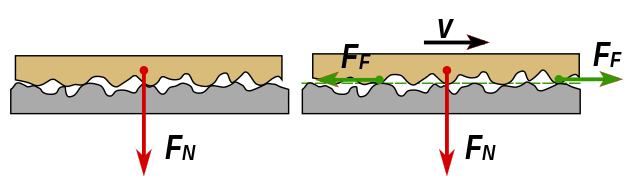
*(Di Walber - Opera propria, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=48043410)*


In [1]:
# Parse data
with open('attrito.csv') as fh:
    materials, mu_s, mu_d = [], [], []
    for line in fh:
        data = line.split(',')
        if 'n.d.' in data[2]:
            continue
        materials.append(data[0])
        mu_s.append(float(data[1]))
        mu_d.append(float(data[2]))

Ordiniamo i dati secondo il valore di $\mu_s$

In [3]:
data = zip(materials, mu_s, mu_d)
sorted(data, key=lambda x : x[1])

[('Acciaio - aria', 0.001, 0.001),
 ('Acciaio - ghiaccio', 0.027, 0.014),
 ('Acciaio - teflon', 0.04, 0.04),
 ('Teflon - Teflon', 0.04, 0.04),
 ('Legno sciolinato - neve', 0.1, 0.05),
 ('Acciaio - acciaio lubrificato', 0.11, 0.05),
 ('legno - cartone', 0.32, 0.23),
 ('Acciaio - ottone', 0.51, 0.44),
 ('Rame - acciaio', 0.53, 0.36),
 ('Acciaio - alluminio', 0.61, 0.47),
 ('Rame - vetro', 0.68, 0.53),
 ('Gomma - asfalto (bagnato)', 0.7, 0.6),
 ('Acciaio - acciaio', 0.74, 0.57),
 ('Vetro - vetro', 0.95, 0.4),
 ('Gomma - asfalto (asciutto)', 1.0, 0.8)]

Tracciamo il coefficiente $\mu_d$ in funzione di $\mu_s$

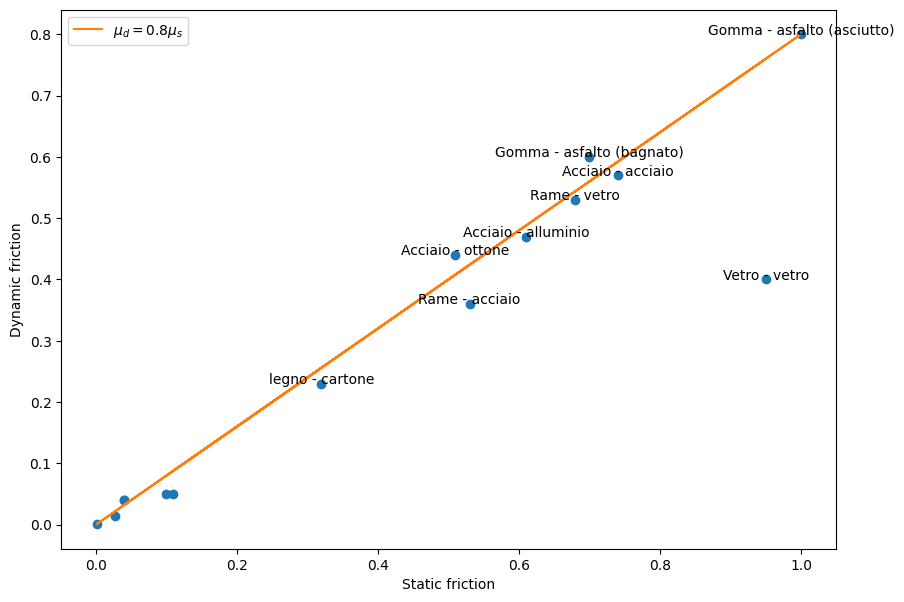

In [4]:
# Have a look at the data
import numpy
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,7
plt.plot(mu_s, mu_d, 'o')
plt.plot(mu_s, numpy.array(mu_s) * 0.8, '-', label='$\mu_d = 0.8 \mu_s$')
plt.xlabel('Static friction')
plt.ylabel('Dynamic friction')
plt.legend()
# Add labels
for m, x, y in zip(materials, mu_s, mu_d):
    if x > 0.2:
        plt.annotate(m, (x, y), ha='center')

**Progetto**: Provate ad estendere il data set aggiungendo nuove coppie di materiali a partire da questi dati https://web.archive.org/web/20190201171526/http://www.roymech.co.uk/Useful_Tables/Tribology/co_of_frict.htm#coef. Potete aggiornare il file `attrito.csv`, oppure inserirli direttamente nel notebook aggiungendoli alle liste così:

In [ ]:
materials.append('materiale1 - materiale2'); mu_s.append(0.6); mu_d.append(0.9)

- La relazione tra $\mu_d$ e $\mu_s$ trovata più in alto è confermata?
- Trovate ulteriori outliers nel data set esteso?
- (*hard*) E' possibile spiegare questi risultati empirici tramite un modello fisico?

## Dipendenza esponenziale

Creiamo un data set sintetico in cui due variabili $y$ e $x$ sono tra loro legate da una dipendenza esponenziale. Aggiungiamo quindi un po' di rumore ai dati. 

In [1]:
import numpy

def func(x, a, b):
    return a * numpy.exp(-b * x)
xdata = numpy.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3)

# Add noise
numpy.random.seed(1729)
y_noise = 0.02 * numpy.random.normal(size=xdata.size)
ydata = y + y_noise

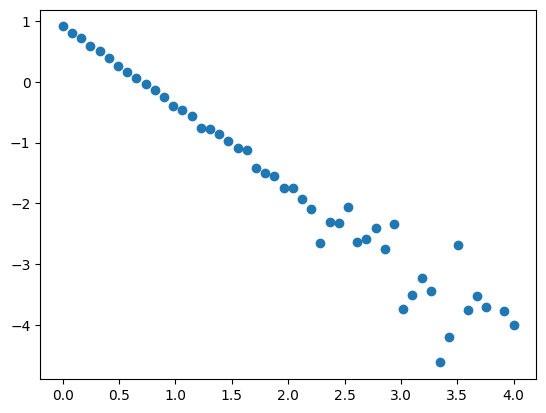

In [3]:
import matplotlib.pyplot as plt

#plt.plot(xdata, ydata, 'o')
plt.plot(xdata, numpy.log(ydata), 'o')